In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('health care.xlsx')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Checking data is imbalanced or not.
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

#### 1.	Preliminary analysis:

#### a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

1

#### b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [9]:
df.drop_duplicates(keep='last',inplace=True)

#### 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

#### a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data 

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

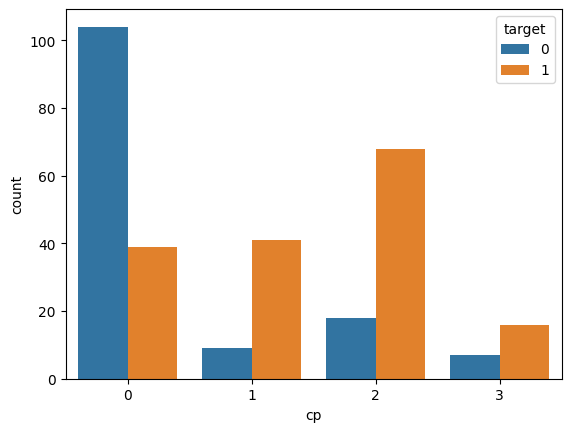

In [11]:
sns.counplot(data=df,x='cp',hue='')

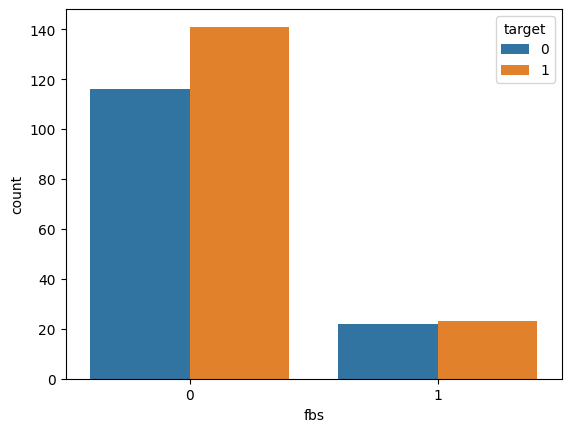

In [12]:
sns.countplot(data=df,x='fbs',hue='target');

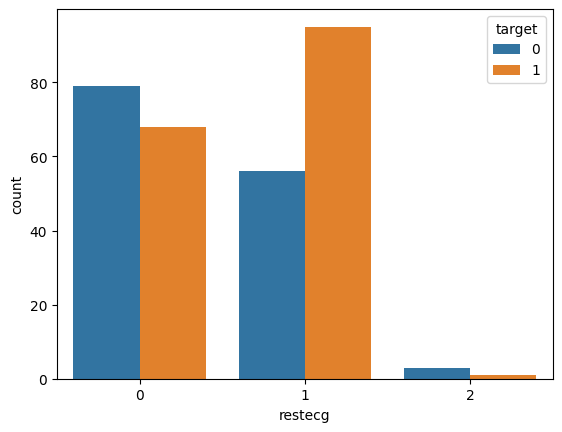

In [13]:
sns.countplot(data=df,x='restecg',hue='target');

<AxesSubplot: xlabel='exang', ylabel='count'>

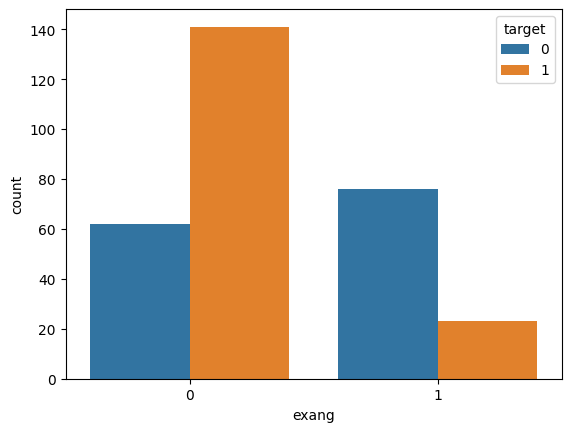

In [14]:
sns.countplot(data=df,x='exang',hue='target')

<AxesSubplot: xlabel='slope', ylabel='count'>

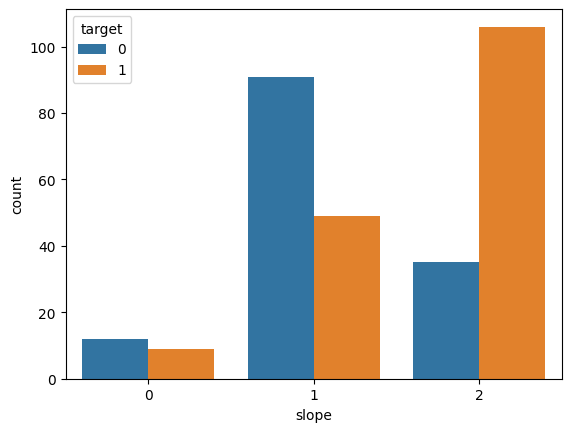

In [15]:
sns.countplot(data=df,x='slope',hue='target')

<AxesSubplot: xlabel='ca', ylabel='count'>

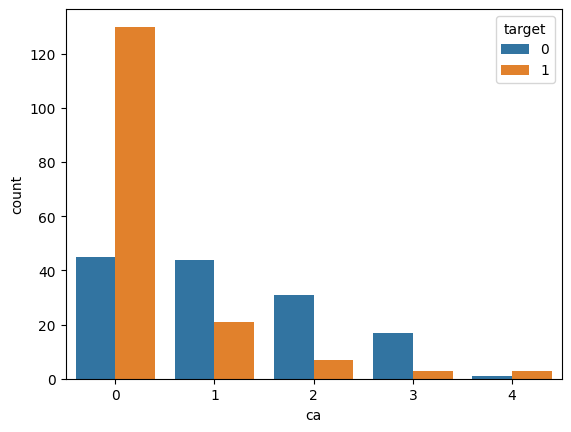

In [16]:
sns.countplot(data=df,x='ca',hue='target')

#### c.	Study the occurrence of CVD across the Age category

<AxesSubplot: xlabel='age', ylabel='Count'>

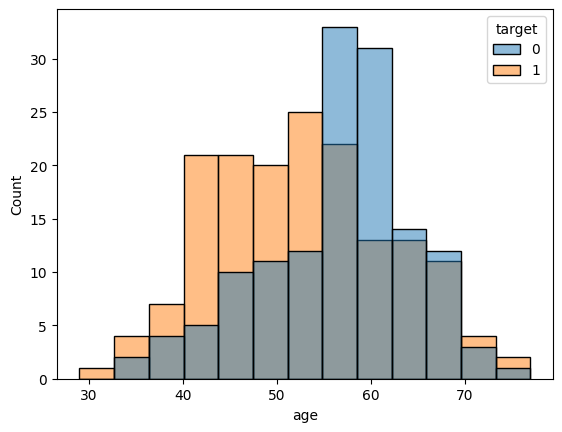

In [17]:
sns.histplot(data=df,x='age',hue='target')

#### d.	Study the composition of all patients with respect to the Sex category

<AxesSubplot: xlabel='sex', ylabel='count'>

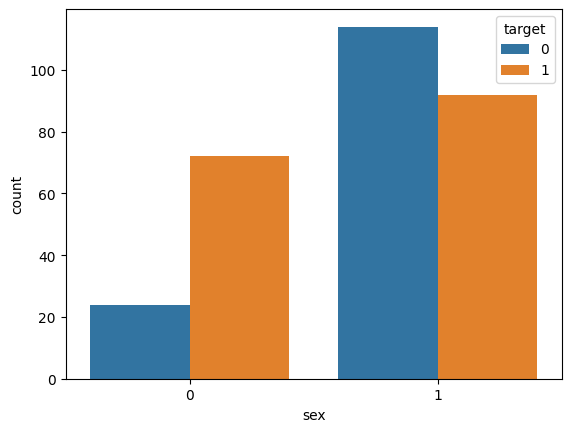

In [18]:
sns.countplot(data=df,x='sex',hue='target')

#### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

<AxesSubplot: xlabel='trestbps', ylabel='Count'>

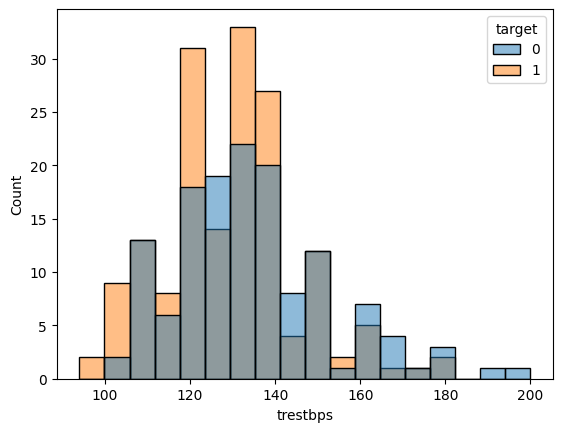

In [19]:
sns.histplot(data=df,x='trestbps',hue='target')

#### f.	Describe the relationship between cholesterol levels and a target variable

<AxesSubplot: xlabel='chol', ylabel='Count'>

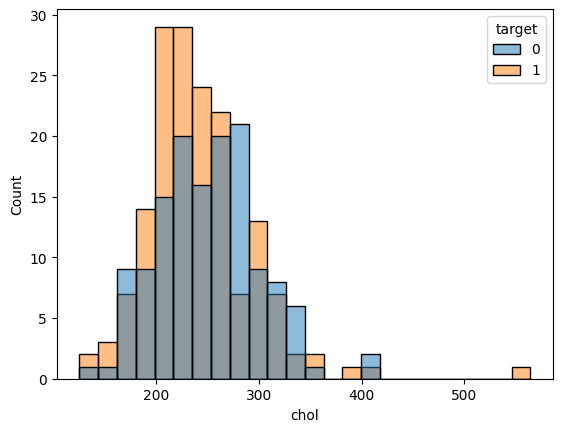

In [20]:
sns.histplot(data=df,x='chol',hue='target')

#### g.	State what relationship exists between peak exercising and the occurrence of a heart attack

<AxesSubplot: xlabel='oldpeak', ylabel='Count'>

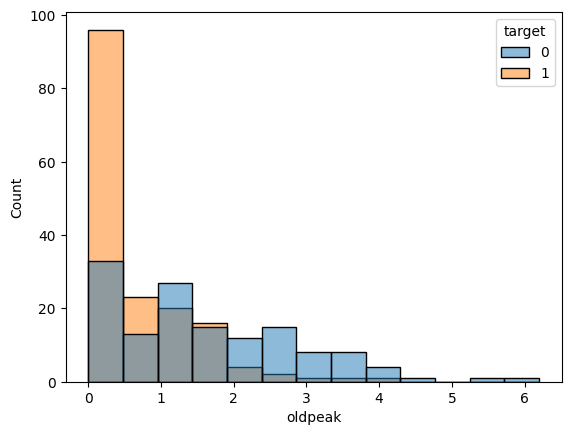

In [21]:
sns.histplot(data=df,x='oldpeak',hue='target')

#### h.	Check if thalassemia is a major cause of CVD

<AxesSubplot: xlabel='thalach', ylabel='Count'>

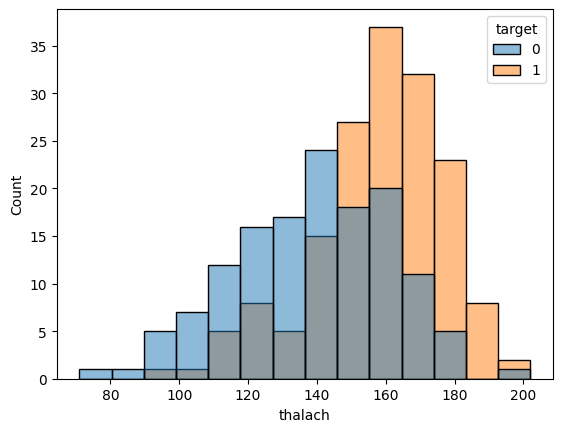

In [22]:
sns.histplot(data=df,x='thalach',hue='target')

#### i.	List how the other factors determine the occurrence of CVD

In [23]:
df.corr().target

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

<AxesSubplot: xlabel='target'>

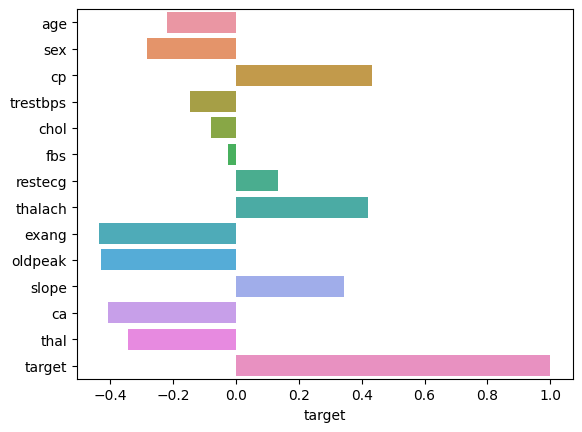

In [24]:
sns.barplot(y=df.columns,x=df.corr()['target'])

#### j.	Use a pair plot to understand the relationship between all the given variables

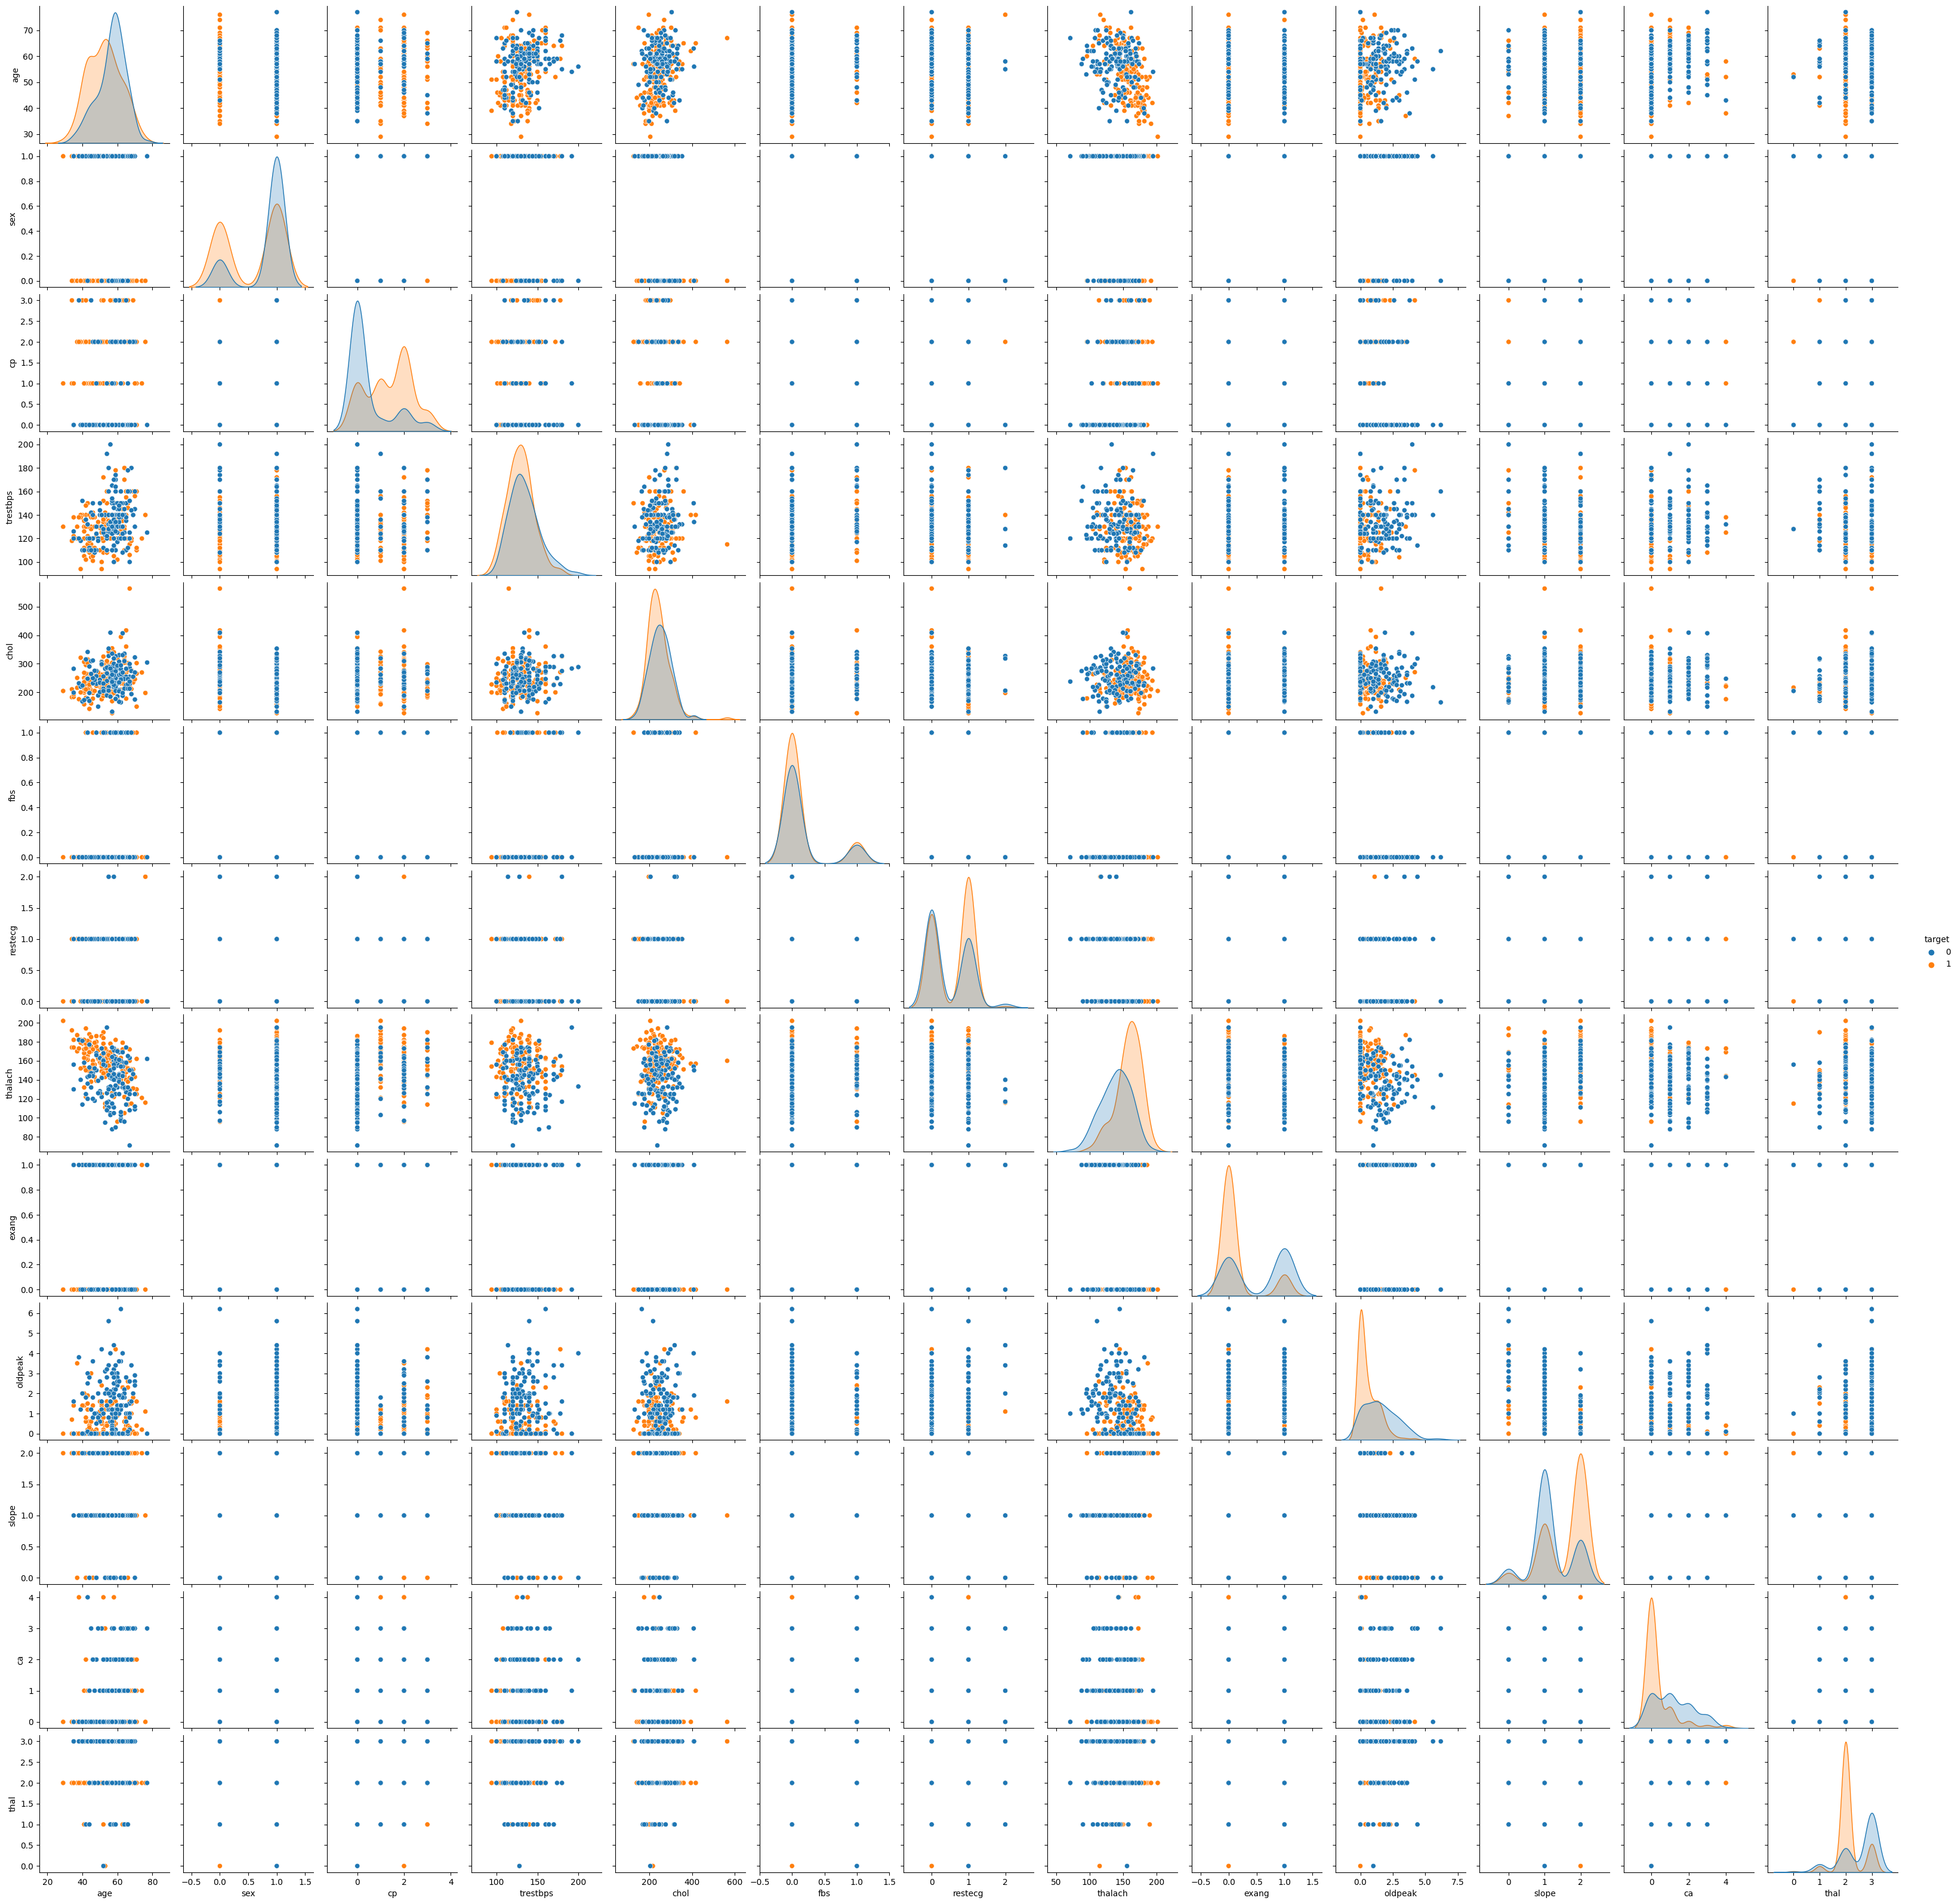

In [25]:
sns.pairplot(data=df,hue='target')

#### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [26]:
df_train,df_test = train_test_split(df,test_size=0.1,random_state=0)

In [27]:
scaler = StandardScaler()

df_train.iloc[:,:-1] = scaler.fit_transform(df_train.iloc[:,:-1])
df_test.iloc[:,:-1] = scaler.transform(df_test.iloc[:,:-1])

In [28]:
df_train.corr().target

age        -0.193820
sex        -0.292826
cp          0.420025
trestbps   -0.157206
chol       -0.046208
fbs        -0.031989
restecg     0.091432
thalach     0.396507
exang      -0.408283
oldpeak    -0.414026
slope       0.360439
ca         -0.434912
thal       -0.335619
target      1.000000
Name: target, dtype: float64

In [29]:
model_log = LogisticRegression()

model_log.fit(df_train.iloc[:,:-1],df_train.target)

LogisticRegression()

In [30]:
yp = model_log.predict(df_test.iloc[:,:-1])
yp

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [31]:
model_log.score(df_test.iloc[:,:-1],df_test.target)

0.9032258064516129

In [32]:
params = {'n_estimators':[25,50,75,100,125],
         'max_depth':[2,3,4,5],
         'min_samples_split':[2,3,4,5],
          'min_samples_leaf':[2,3,4,5]}

In [33]:
grid_cv = GridSearchCV(RandomForestClassifier(random_state=0),param_grid=params,cv=5,n_jobs=20,verbose=1)

grid_cv.fit(df_train.iloc[:,:-1],df_train.target)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=20,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [25, 50, 75, 100, 125]},
             verbose=1)

In [34]:
grid_cv.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [35]:
model_rf = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=3,min_samples_leaf=5)

model_rf.fit(df_train.iloc[:,:-1],df_train.target)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, random_state=0)

In [36]:
yp = model_rf.predict(df_test.iloc[:,:-1])
yp

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [37]:
model_rf.score(df_test.iloc[:,:-1],df_test.target)

0.9354838709677419